Vedar Sentiment Analysis of News @ Twitter by "@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes"


Observations: 

Observed Trend 1: Twitter comments appear to have a slight negative polarization when viewed in a scatter plot

Observed Trend 2: Visualized from a bar graph, the compound VADER sentiment scores across each news agency is Positive except  NYTimes which has a score towards negativity.

Observed Trend 3: The CBS Tweets appear to maintain the most Positive Vader score.

In [162]:
#Dependencies.

import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [163]:
# Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [164]:
# Setup Tweepy API Authentication.

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [165]:
#Get tweets from each news organization's twitter feeds.



# A list to hold sentiments.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]
        raw_time = tweet['created_at']

        #Add sentiments for each tweet to the sentiments list.
        
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        date_stamp = converted_time.strftime("%m-%d-%Y")
        converted_time = converted_time.strftime("%m-%d-%Y %H:%M:%S") 

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [166]:
#Create DataFrame.

twitter_data = pd.DataFrame.from_dict(sentiments)
twitter_data

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Wed Jun 27 15:09:27 +0000 2018,0.000,1.000,0.000,🕺 *Knight Fever* \n\nBee Gee Sir Barry Gibb pa...,0,@BBC
1,0.0000,Wed Jun 27 14:42:13 +0000 2018,0.000,1.000,0.000,RT @bbccomedy: Some writing advice from an exp...,1,@BBC
2,0.0000,Wed Jun 27 13:05:07 +0000 2018,0.000,1.000,0.000,French butchers have written to the government...,2,@BBC
3,-0.5106,Wed Jun 27 11:52:00 +0000 2018,0.350,0.650,0.000,☕️ How a simple change is cutting coffee cup w...,3,@BBC
4,0.9403,Wed Jun 27 11:39:52 +0000 2018,0.000,0.536,0.464,"RT @BBCBreakfast: Dear Summer, ☀️\nWe're enjoy...",4,@BBC
5,0.0000,Wed Jun 27 11:03:04 +0000 2018,0.000,1.000,0.000,🦔🧙 Did you know people used to think hedgehogs...,5,@BBC
6,0.0000,Wed Jun 27 09:30:20 +0000 2018,0.000,1.000,0.000,😐 This is what happens when you hire an arts a...,6,@BBC
7,0.6114,Wed Jun 27 08:47:40 +0000 2018,0.050,0.756,0.194,RT @BBCArchive: Computer geeks - this is your ...,7,@BBC
8,0.0000,Wed Jun 27 08:01:05 +0000 2018,0.000,1.000,0.000,👟 @MumsnetTowers founder @Justine_Roberts on w...,8,@BBC
9,0.5106,Wed Jun 27 07:29:04 +0000 2018,0.047,0.809,0.145,😴 The colour cyan - between green and blue - i...,9,@BBC


In [192]:
#Export the DataFrame to as csv.

twitter_data.to_csv("Sentiments of twitter News.csv", index=False)

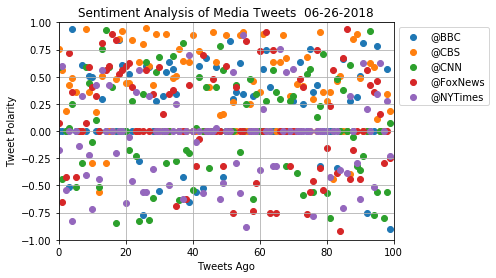

In [169]:
#Plot scatterplot graph.

# Plot field size
plt.xlim(0, counter)
plt.ylim(-1, 1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = twitter_data.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets  " + str(date_stamp))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [170]:
average_sentiment_comp = twitter_data.groupby("User")["Compound"].mean()
average_sentiment_comp

User
@BBC        0.146585
@CBS        0.356899
@CNN        0.039703
@FoxNews    0.100575
@NYTimes   -0.058262
Name: Compound, dtype: float64

Text(0.5,0,'Twitter News Channels')

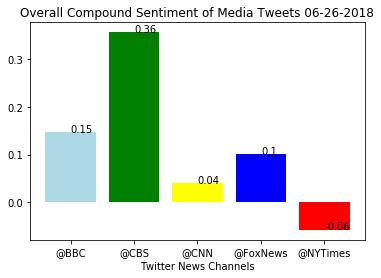

In [175]:
x_axis = np.arange(len(average_sentiment_comp))
xlabels = average_sentiment_comp.index
count = 0
for comp_sentiment in average_sentiment_comp:
    plt.text(count, comp_sentiment+0.001, str(round(comp_sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment_comp, tick_label = xlabels, color = ["lightblue", "green", "yellow", "blue", "red"])
#Set title, x axis label, and y axis label.
plt.title("Overall Compound Sentiment of Media Tweets " + str(date_stamp))
plt.xlabel("Twitter News Channels")


In [176]:
average_sentiment_pos = twitter_data.groupby("User")["Positive"].mean()
average_sentiment_pos

User
@BBC        0.09398
@CBS        0.19271
@CNN        0.09106
@FoxNews    0.11218
@NYTimes    0.06005
Name: Positive, dtype: float64

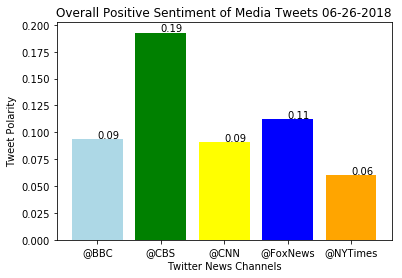

In [184]:
x_axis = np.arange(len(average_sentiment_pos))
xlabels = (average_sentiment_pos.index)
count = 0
for psentiment in average_sentiment_pos:
    plt.text(count, psentiment+0.001, str(round(psentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment_pos, tick_label = xlabels, color = ["lightblue", "green", "yellow", "blue", "orange"])
#Set title, x axis label, and y axis label.
plt.title("Overall Positive Sentiment of Media Tweets " + str(date_stamp))
plt.xlabel("Twitter News Channels")
plt.ylabel("Tweet Polarity")
plt.savefig("Positive Sentiment")
plt.show()

In [185]:
average_sentiment_neu = twitter_data.groupby("User")["Neutral"].mean()
average_sentiment_neu

User
@BBC        0.86393
@CBS        0.79199
@CNN        0.82960
@FoxNews    0.82259
@NYTimes    0.86049
Name: Neutral, dtype: float64

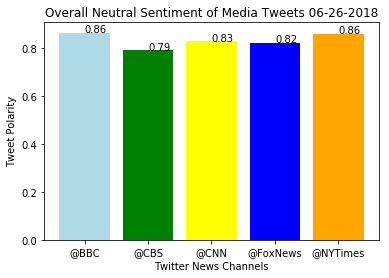

In [193]:
x_axis = np.arange(len(average_sentiment_neu))
xlabels = average_sentiment_neu.index
count = 0
for neu_sentiment in average_sentiment_neu:
    plt.text(count, neu_sentiment+0.001, str(round(neu_sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment_neu, tick_label = xlabels, color = ["lightblue", "green", "yellow", "blue", "orange"])
#Set title, x axis label, and y axis label.
plt.title("Overall Neutral Sentiment of Media Tweets " + str(date_stamp))
plt.xlabel("Twitter News Channels")
plt.ylabel("Tweet Polarity")
plt.savefig("Neutral Sentiments")
plt.show()

In [190]:
average_sentiment_neg = twitter_data.groupby("User")["Negative"].mean()
average_sentiment_neg

User
@BBC        0.04210
@CBS        0.01532
@CNN        0.07937
@FoxNews    0.06522
@NYTimes    0.07950
Name: Negative, dtype: float64

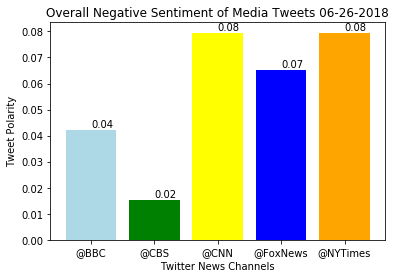

In [191]:
x_axis = np.arange(len(average_sentiment_neg))
xlabels = average_sentiment_neg.index
count = 0
for neg_sentiment in average_sentiment_neg:
    plt.text(count, neg_sentiment+0.001, str(round(neg_sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment_neg, tick_label = xlabels, color = ["lightblue", "green", "yellow", "blue", "orange"])
#Set title, x axis label, and y axis label.
plt.title("Overall Negative Sentiment of Media Tweets " + str(date_stamp))
plt.xlabel("Twitter News Channels")
plt.ylabel("Tweet Polarity")
plt.savefig("Negative Sentiment")
plt.show()